Signal length: 650000
Sample annotations: ['+', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N']
Sampling rate: 360 Hz


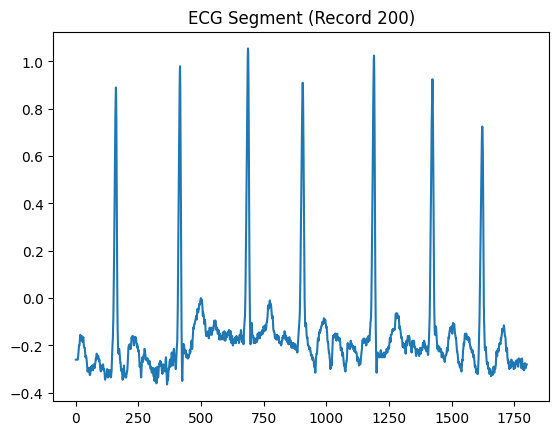

In [1]:
import wfdb
import matplotlib.pyplot as plt

# Load record 100 (MLII lead = channel 0)
record = wfdb.rdrecord('mitdb/201', channels=[0])
annotation = wfdb.rdann('mitdb/201', 'atr')

print("Signal length:", len(record.p_signal))
print("Sample annotations:", annotation.symbol[:10])
print("Sampling rate:", record.fs, "Hz")

# Plot 5 seconds of ECG
plt.plot(record.p_signal[:1800])  # 5 sec = 360*5
plt.title(f"ECG Segment (Record 200)")
plt.show()

In [2]:
import wfdb
import numpy as np
import os

# Define label mapping (binary: 0=normal, 1=abnormal)
label_map = {
    'N': 0, 'L': 0, 'R': 0, 'B': 0, 'A': 0, 'a': 0, 'J': 0, 'S': 0, 'j': 0,
    'V': 1, 'E': 1, 'F': 1,  # PVCs, VF risk
    '/': 2, 'Q': 2, 'f': 2   # Ignore noise/unknown
}

# Get all record names (from RECORDS file or list)
record_names = [f.replace('.dat', '') for f in os.listdir('mitdb') if f.endswith('.dat')]

X, y = [], []

for rec in record_names:
    try:
        # Load signal (use MLII = channel 0 if available)
        record = wfdb.rdrecord(f'mitdb/{rec}', channels=[0])
        ann = wfdb.rdann(f'mitdb/{rec}', 'atr')
        signal = record.p_signal.flatten()
        
        for i, sample in enumerate(ann.sample):
            sym = ann.symbol[i]
            if sym not in label_map or label_map[sym] == 2:
                continue  # Skip unknown/noise
            
            # Extract 1-second window centered on R-peak
            win_len = 360  # 1 sec at 360 Hz
            start = sample - win_len // 2
            end = sample + win_len // 2
            
            if start >= 0 and end < len(signal):
                X.append(signal[start:end])
                y.append(label_map[sym])
                
    except Exception as e:
        print(f"Skipped {rec}: {e}")

X = np.array(X)
y = np.array(y)

print(f"Dataset shape: {X.shape}, Labels: {np.bincount(y)}")
# Save for reuse
np.save('X.npy', X)
np.save('y.npy', y)

Dataset shape: (101384, 360), Labels: [93347  8037]


/Users/shreyashsingh/Documents/Heart prediction/venv/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 354, 32)        │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 177, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 173, 64)        │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 86, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 84, 64)         │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5376)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       344,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 367,105 (1.40 MB)

 Trainable params: 367,105 (1.40 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 0.9408 - loss: 0.1746 - val_accuracy: 0.9558 - val_loss: 0.1497
Epoch 2/15
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 34s 27ms/step - accuracy: 0.9745 - loss: 0.0941 - val_accuracy: 0.9644 - val_loss: 0.1066
Epoch 3/15
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 35s 28ms/step - accuracy: 0.9825 - loss: 0.0715 - val_accuracy: 0.9894 - val_loss: 0.0448
Epoch 4/15
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 38s 30ms/step - accuracy: 0.9861 - loss: 0.0597 - val_accuracy: 0.9910 - val_loss: 0.0358
Epoch 5/15
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 36s 28ms/step - accuracy: 0.9887 - loss: 0.0522 - val_accuracy: 0.9928 - val_loss: 0.0307
Epoch 6/15
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 38s 30ms/step - accuracy: 0.9898 - loss: 0.0440 - val_accuracy: 0.9925 - val_loss: 0.0330
Epoch 7/15
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 35s 28ms/step - accuracy: 0.9907 - loss: 0.0463 - val_accuracy: 0.9936 - val_loss: 0.0263
Epoch 8/15
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 41s 32ms/step - accuracy: 0.9931 -

634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

✅ Test Accuracy: 0.9941 (99.41%)

📋 Confusion Matrix:
[[18584    86]
 [   33  1574]]

📊 Classification Report:
              precision    recall  f1-score   support

  Normal (0)       1.00      1.00      1.00     18670
Abnormal (1)       0.95      0.98      0.96      1607

    accuracy                           0.99     20277
   macro avg       0.97      0.99      0.98     20277
weighted avg       0.99      0.99      0.99     20277



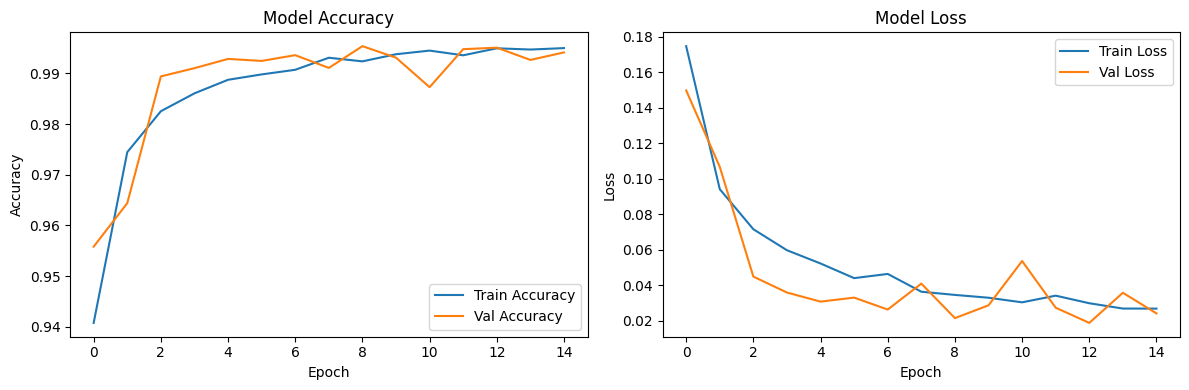

In [3]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load data
X = np.load('X.npy')
y = np.load('y.npy')

# Reshape for CNN: (samples, timesteps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Handle class imbalance
class_weights = dict(enumerate(
    class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
))

# Build model
model = Sequential([
    Conv1D(32, 7, activation='relu', input_shape=(360, 1)),
    MaxPooling1D(2),
    Conv1D(64, 5, activation='relu'),
    MaxPooling1D(2),
    Conv1D(64, 3, activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Train
history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=64,
    validation_data=(X_test, y_test),
    class_weight=class_weights
)

# Save model
model.save('arrhythmia_cnn.h5')

# -----------------------------
# 🔍 EVALUATION ON TEST SET
# -----------------------------
# Get predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Compute accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Test Accuracy: {test_accuracy:.4f} ({test_accuracy * 100:.2f}%)")

# Confusion Matrix
print("\n📋 Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Classification Report
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Normal (0)', 'Abnormal (1)']))

# Optional: Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [6]:
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Load test data (you must have X_test, y_test saved or re-created)
# Option A: Re-split the data (same as in training)
X = np.load('X.npy')
y = np.load('y.npy')
X = X.reshape(X.shape[0], X.shape[1], 1)

from sklearn.model_selection import train_test_split
_, X_test, _, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Step 2: Load the saved model
model = load_model('arrhythmia_cnn.h5')

# Step 3: Predict on test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Step 4: Evaluate
test_acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_acc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Normal', 'Abnormal']))

634/634 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
Test Accuracy: 0.9941

Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     18670
    Abnormal       0.95      0.98      0.96      1607

    accuracy                           0.99     20277
   macro avg       0.97      0.99      0.98     20277
weighted avg       0.99      0.99      0.99     20277



In [16]:
import numpy as np
from tensorflow.keras.models import load_model
import wfdb

model = load_model('arrhythmia_cnn.h5')

# Example: load record 200, take first 1-sec window
record = wfdb.rdrecord('mitdb/205', channels=[0])
ecg_segment = record.p_signal[:360].flatten()  # First second

# Preprocess
ecg_segment = ecg_segment.reshape(1, 360, 1)

# Predict
prob = model.predict(ecg_segment)[0][0]
risk = "High risk of dangerous arrhythmia" if prob > 0.5 else "Normal rhythm"

print(f"Prediction: {risk} (Probability: {prob:.2f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Prediction: Normal rhythm (Probability: 0.00)
